In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Load energy dataset
df = pd.read_csv("../datasets/energy/energy.csv")

df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/energy/energy.csv'

In [3]:
import os
os.listdir("../datasets/energy")


['KwhConsumptionBlower78_1.csv',
 'KwhConsumptionBlower78_2.csv',
 'KwhConsumptionBlower78_3.csv']

In [4]:
df.info()


NameError: name 'df' is not defined

In [5]:
df = pd.read_csv("../datasets/energy/energy.csv")
df.head()


FileNotFoundError: [Errno 2] No such file or directory: '../datasets/energy/energy.csv'

In [6]:
os.listdir("../datasets/energy")


['KwhConsumptionBlower78_1.csv',
 'KwhConsumptionBlower78_2.csv',
 'KwhConsumptionBlower78_3.csv']

In [7]:
import pandas as pd

df = pd.read_csv("../datasets/energy/KwhConsumptionBlower78_1.csv")
df.head()


,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1228 entries, 0 to 1227
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1228 non-null   int64  
 1   TxnDate      1228 non-null   object 
 2   TxnTime      1228 non-null   object 
 3   Consumption  1228 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 38.5+ KB


In [9]:
df = df.drop(columns=["Unnamed: 0"])
df.head()


,TxnDate,TxnTime,Consumption
0,01 Jan 2022,16:55:52,1.010
1,01 Jan 2022,21:45:29,0.908
2,01 Jan 2022,12:24:52,0.926
3,01 Jan 2022,04:07:36,0.928
4,01 Jan 2022,06:52:25,0.916


In [10]:
# Convert date and time to datetime
df["Datetime"] = pd.to_datetime(
    df["TxnDate"] + " " + df["TxnTime"],
    errors="coerce"
)

# Extract useful time features
df["Day"] = df["Datetime"].dt.day
df["Month"] = df["Datetime"].dt.month
df["Hour"] = df["Datetime"].dt.hour
df["Minute"] = df["Datetime"].dt.minute

df.head()


,TxnDate,TxnTime,Consumption,Datetime,Day,Month,Hour,Minute
0,01 Jan 2022,16:55:52,1.010,2022-01-01 16:55:52,1,1,16,55
1,01 Jan 2022,21:45:29,0.908,2022-01-01 21:45:29,1,1,21,45
2,01 Jan 2022,12:24:52,0.926,2022-01-01 12:24:52,1,1,12,24
3,01 Jan 2022,04:07:36,0.928,2022-01-01 04:07:36,1,1,4,7
4,01 Jan 2022,06:52:25,0.916,2022-01-01 06:52:25,1,1,6,52


In [11]:
df = df.drop(columns=["TxnDate", "TxnTime", "Datetime"])
df.head()


,Consumption,Day,Month,Hour,Minute
0,1.010,1,1,16,55
1,0.908,1,1,21,45
2,0.926,1,1,12,24
3,0.928,1,1,4,7
4,0.916,1,1,6,52


In [12]:
X = df.drop("Consumption", axis=1)
y = df["Consumption"]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestRegressor

rf_energy = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

rf_energy.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = rf_energy.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Energy MAE:", mae)
print("Energy RMSE:", rmse)


Energy MAE: 1.071271544715447
Energy RMSE: 2.2314815015710203


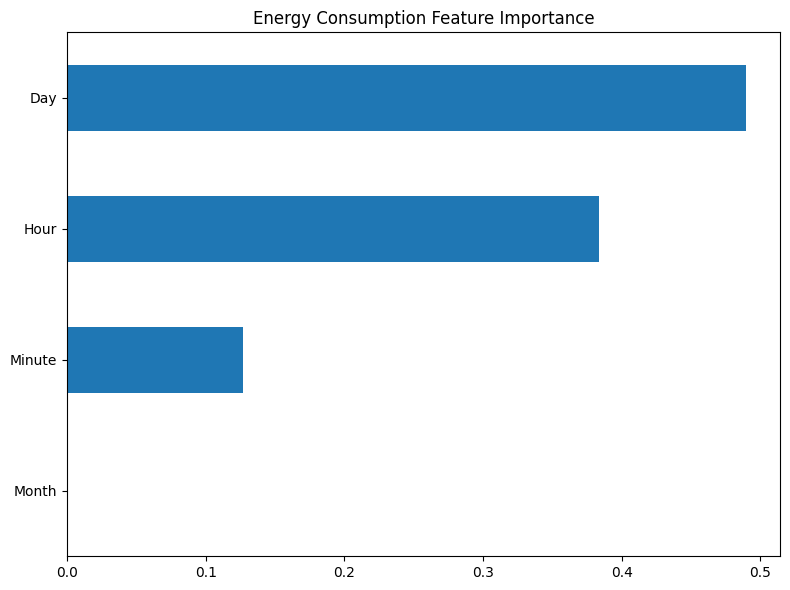

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

importance = rf_energy.feature_importances_
features = X.columns

fi = pd.Series(importance, index=features).sort_values()

plt.figure(figsize=(8,6))
fi.plot(kind="barh")
plt.title("Energy Consumption Feature Importance")
plt.tight_layout()
plt.show()


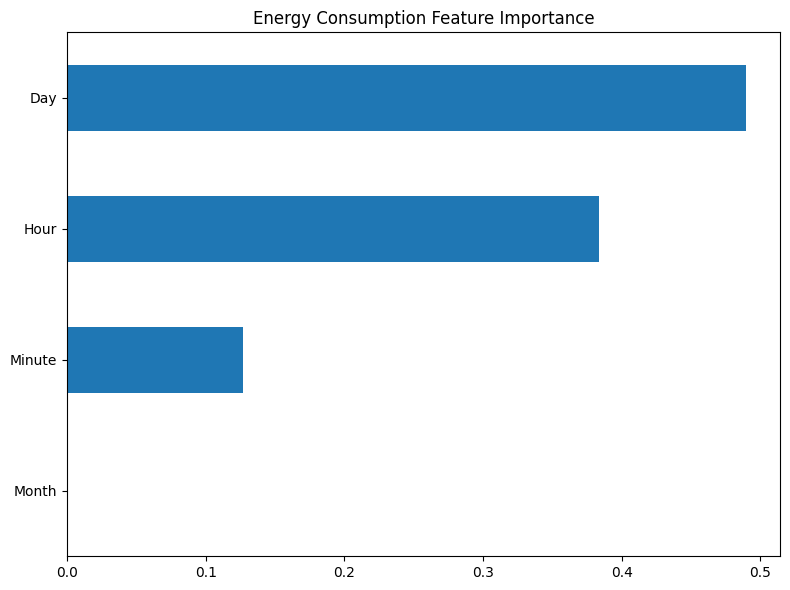

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

importance = rf_energy.feature_importances_
features = X.columns

fi = pd.Series(importance, index=features).sort_values()

plt.figure(figsize=(8,6))
fi.plot(kind="barh")
plt.title("Energy Consumption Feature Importance")
plt.tight_layout()

# 👇 THIS LINE SAVES THE IMAGE
plt.savefig("../results/energy_feature_importance.png")

plt.show()
